# **1) Data Cleaning**

In [15]:
import pandas as pd
path = '/content/trovit.csv'
df = pd.read_csv (path, sep=';')
df

,Price,Type,City,bedrooms,bathrooms,Size
0,"ZAR650,000",Homes,Eastern Cape,3.0,1.0,NaN
1,"ZAR2,200,000",Homes,Eastern Cape,3.0,3.0,NaN
2,"ZAR780,000",Homes,Eastern Cape,2.0,1.0,NaN
3,"ZAR2,200,000",Homes,Eastern Cape,2.0,2.0,NaN
4,"ZAR4,500,000",House,Eastern Cape,8.0,6.0,NaN
...,...,...,...,...,...,...
2495,"ZAR695,000",Homes,Eastern Cape,NaN,1.0,NaN
2496,"ZAR590,000",Homes,Gauteng,NaN,1.0,NaN
2497,"ZAR968,000",Flat,Eastern Cape,3.0,1.0,69.0
2498,"ZAR360,000",land,Eastern Cape,NaN,NaN,NaN


## **1.1) Counting the number of missing value in each columns in % format**

In [16]:
nan_count_list = df.isnull().sum()
for i in range(len(nan_count_list)) :
    nan_count_list[i] = (nan_count_list[i]/df.shape[0])*100
nan_count_list

Price         0
Type          0
City          0
bedrooms     20
bathrooms     4
Size         72
dtype: int64

### **1.1.1) Replacing each missng value (NaN) into the size column into the mean value of the set of non missing value**

In [17]:
import numpy as np
size = np.array(df['Size'].dropna())
m_size = size.mean()
del size
m_size

210.28571428571428

In [18]:
df['Size'] = df['Size'].fillna (m_size)
df['Size']

0       210.285714
1       210.285714
2       210.285714
3       210.285714
4       210.285714
           ...    
2495    210.285714
2496    210.285714
2497     69.000000
2498    210.285714
2499    160.000000
Name: Size, Length: 2500, dtype: float64

### **1.1.2) Removing lines which contain missing value (NaN) in the column bathrooms**

In [19]:
df = df.dropna (subset = ['bathrooms'])
df['bathrooms']

0       1.0
1       3.0
2       1.0
3       2.0
4       6.0
       ... 
2494    1.0
2495    1.0
2496    1.0
2497    1.0
2499    2.0
Name: bathrooms, Length: 2400, dtype: float64

### **1.1.3) Replacing each missing value (NaN) of the column bedrooms with the median of the non missing value of ths column**

In [20]:
bedroom = np.array(df['bedrooms'].dropna())
med_bedrooms = np.median (bedroom)
print (f"median of non NaN value: {med_bedrooms}\n")
df['bedrooms'] = df['bedrooms'].fillna (med_bedrooms)
del bedroom
print(df['bedrooms'])

median of non NaN value: 3.0

0       3.0
1       3.0
2       2.0
3       2.0
4       8.0
       ... 
2494    3.0
2495    3.0
2496    3.0
2497    3.0
2499    5.0
Name: bedrooms, Length: 2400, dtype: float64


<ipython-input-20-b9960fd2dc84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'] = df['bedrooms'].fillna (med_bedrooms)


## **1.2) Transform each value of the column Price into float format**

### **1.2.1) Searching for a non regular values**

In [21]:
mask = ~df['Price'].str.contains(r'^ZAR[\d,]')
price = df.loc[mask, 'Price']
print (f"Number of non regular values: {len(price)}")

Number of non regular values: 0


### **1.2.2) Transform each value into float format**

In [22]:
import re
tmp = []
for i in df['Price'] :
    i = re.sub (r'[ZAR,]','',str(i))
    tmp.append (float(i))
df['Price'] = tmp
df['Price']

<ipython-input-22-ba126c416a08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = tmp


0        650000.0
1       2200000.0
2        780000.0
3       2200000.0
4       4500000.0
          ...    
2494     580000.0
2495     695000.0
2496     590000.0
2497     968000.0
2499     895000.0
Name: Price, Length: 2400, dtype: float64

### **1.2.3) Fixing non regular values of the Type column**

In [23]:
df['Type'] = df['Type'].str.replace (r'house','House')
df['Type']

<ipython-input-23-a2d3ff73eeca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].str.replace (r'house','House')


0       Homes
1       Homes
2       Homes
3       Homes
4       House
        ...  
2494    Homes
2495    Homes
2496    Homes
2497     Flat
2499    House
Name: Type, Length: 2400, dtype: object

## **1.3) Changing columns name into adequate name**

In [24]:
new_col_name = ['Price(ZAR)','House Type','City','Bedrooms','Bathrooms','Size(m2)']
df.columns = new_col_name
df

,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
0,650000.0,Homes,Eastern Cape,3.0,1.0,210.285714
1,2200000.0,Homes,Eastern Cape,3.0,3.0,210.285714
2,780000.0,Homes,Eastern Cape,2.0,1.0,210.285714
3,2200000.0,Homes,Eastern Cape,2.0,2.0,210.285714
4,4500000.0,House,Eastern Cape,8.0,6.0,210.285714
...,...,...,...,...,...,...
2494,580000.0,Homes,Eastern Cape,3.0,1.0,210.285714
2495,695000.0,Homes,Eastern Cape,3.0,1.0,210.285714
2496,590000.0,Homes,Gauteng,3.0,1.0,210.285714
2497,968000.0,Flat,Eastern Cape,3.0,1.0,69.000000


# **2) Exploratory Data Analysis**

## **2.1) Basics statistical description of data**

In [25]:
stat_description = df.describe().drop('count')
stat_description = stat_description.rename (index = {'25%':'Q1','50%':'median','75%':'Q3'})
City_count = df['City'].value_counts()
Type_count = df['House Type'].value_counts()
non_numeric = "Counts of non numeric columns"
numeric = "Descriptive statistics of numerical columns"
print(f"{non_numeric.upper()}:\n\n{City_count}\n\n{Type_count}\n\n\n")
print (f"{numeric.upper()}:\n\n{stat_description}")

COUNTS OF NON NUMERIC COLUMNS:

 Eastern Cape     2300
 Gauteng           100
Name: City, dtype: int64

Homes    1600
House     700
Flat      100
Name: House Type, dtype: int64



DESCRIPTIVE STATISTICS OF NUMERICAL COLUMNS:

          Price(ZAR)  Bedrooms  Bathrooms    Size(m2)
mean    1.844500e+06  3.708333   1.875000  210.285714
std     1.651217e+06  1.594048   1.235588   66.248685
min     5.500000e+05  2.000000   1.000000   69.000000
Q1      6.837500e+05  3.000000   1.000000  210.285714
median  1.076500e+06  3.000000   1.500000  210.285714
Q3      2.212500e+06  5.000000   2.000000  210.285714
max     6.700000e+06  8.000000   6.000000  450.000000


***Comments***<br>
Here is what can be deduced at first glance:

1) >95% of sales are houses locate at Eastern Cape and the rest at Gauteng<br>
2) There are three (3) types of houses:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Homes (66.667%)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Houses (29.166%)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Flat (4.167%)<br>
3) According to the prices column, there are two categories of houses:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Properties with values between ZAR5,500,000 and ZAR22,125,000 (75%)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Properties with values greater than ZAR22,125,000 (25%)

In [26]:
above_Q3 = df[df['Price(ZAR)']>2.212500e+06]
under_Q3 = df[df['Price(ZAR)']<=2.212500e+06]
print (f"Above Q3:\n{above_Q3}\n\nUNder Q3:\n{under_Q3}")

Above Q3:
      Price(ZAR) House Type            City  Bedrooms  Bathrooms    Size(m2)
4      4500000.0      House   Eastern Cape        8.0        6.0  210.285714
7      2485000.0      Homes   Eastern Cape        3.0        2.0  210.285714
8      2250000.0      Homes   Eastern Cape        3.0        2.0  210.285714
11     5950000.0      House   Eastern Cape        5.0        4.0  450.000000
17     6700000.0      House   Eastern Cape        5.0        4.0  325.000000
...          ...        ...             ...       ...        ...         ...
2482   2485000.0      Homes   Eastern Cape        3.0        2.0  210.285714
2483   2250000.0      Homes   Eastern Cape        3.0        2.0  210.285714
2486   5950000.0      House   Eastern Cape        5.0        4.0  450.000000
2492   6700000.0      House   Eastern Cape        5.0        4.0  325.000000
2493   2850000.0      Homes   Eastern Cape        5.0        1.0  210.285714

[600 rows x 6 columns]

UNder Q3:
      Price(ZAR) House Type    

**Comments**<br>
Observing the variation of prices based on sizes, we note that the price tends to increase more or less with the size.<br>
So, replacing the NaN values in the 'Size(m2)' column was not an appropriate method for handling missing values. To make the data more consistent, it is better to calculate an average for sizes with a price greater than ZAR22,125,000 and another average for sizes with a price less than ZAR22,125,000.

In [27]:
old_above_Q3 = above_Q3[above_Q3['Size(m2)'] != m_size]
old_under_Q3 = under_Q3[under_Q3['Size(m2)'] != m_size]
print (f"Above Q3:\n{old_above_Q3.describe().drop('count')}\n\nUnder Q3:\n{old_under_Q3.describe().drop('count')}")

Above Q3:
        Price(ZAR)  Bedrooms  Bathrooms    Size(m2)
mean  6.325000e+06       5.0        4.0  387.500000
std   3.759410e+05       0.0        0.0   62.656838
min   5.950000e+06       5.0        4.0  325.000000
25%   5.950000e+06       5.0        4.0  325.000000
50%   6.325000e+06       5.0        4.0  387.500000
75%   6.700000e+06       5.0        4.0  450.000000
max   6.700000e+06       5.0        4.0  450.000000

Under Q3:
        Price(ZAR)  Bedrooms  Bathrooms    Size(m2)
mean  1.431600e+06  3.400000   1.600000  139.400000
std   4.685887e+05  0.800801   0.490389   43.731738
min   8.950000e+05  3.000000   1.000000   69.000000
25%   9.680000e+05  3.000000   1.000000  110.000000
50%   1.350000e+06  3.000000   2.000000  160.000000
75%   1.950000e+06  3.000000   2.000000  170.000000
max   1.995000e+06  5.000000   2.000000  188.000000


In [28]:
size_above_Q3_mean = old_above_Q3['Size(m2)'].mean()
size_under_Q3_mean = old_under_Q3['Size(m2)'].mean()
for i in range(df.shape[0]) :
  if df.iloc[i, 0]>2.212500e+06 and df.iloc[i, -1]==m_size  :
    df.iloc[i, -1] = size_above_Q3_mean
  if df.iloc[i, 0]<= 2.212500e+06 and df.iloc[i, -1]==m_size :
    df.iloc[i, -1] = size_under_Q3_mean
df

,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
0,650000.0,Homes,Eastern Cape,3.0,1.0,139.4
1,2200000.0,Homes,Eastern Cape,3.0,3.0,139.4
2,780000.0,Homes,Eastern Cape,2.0,1.0,139.4
3,2200000.0,Homes,Eastern Cape,2.0,2.0,139.4
4,4500000.0,House,Eastern Cape,8.0,6.0,387.5
...,...,...,...,...,...,...
2494,580000.0,Homes,Eastern Cape,3.0,1.0,139.4
2495,695000.0,Homes,Eastern Cape,3.0,1.0,139.4
2496,590000.0,Homes,Gauteng,3.0,1.0,139.4
2497,968000.0,Flat,Eastern Cape,3.0,1.0,69.0


## **2.2) Univariate Analysis**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')

def stat_numerical_feature (col) :
  mean = col.mean()
  std = col.std()
  median = col.median()
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  max = col.max()
  min = col.min()
  frequences = col.value_counts(normalize=True)*100
  info = {
      'max': max,
      'min': min,
      'mean':mean,
      'std': std,
      'Q1': q1,
      'median': median,
      'Q3': q3,
      'Frequences': frequences
  }
  return info

def stat_nonnum_feature (col) :
  return col.value_counts(normalize=True)*100

### **2.2.1) House Type**

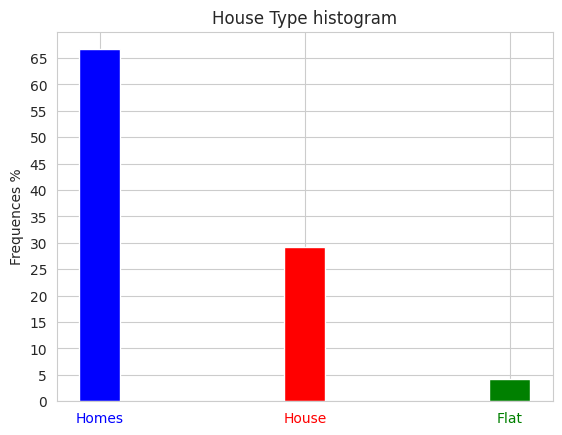

Homes    66.666667
House    29.166667
Flat      4.166667
Name: House Type, dtype: float64


In [30]:
frequences = stat_nonnum_feature (df['House Type'])
colors = ['blue','red','green']
plt.bar (frequences.index, frequences.values, edgecolor='white', color=colors, width=0.2)
plt.ylabel('Frequences %')
plt.title('House Type histogram')
plt.yticks(range(0,67,5))
for i, color in zip(plt.gca().get_xticklabels(), colors):
    i.set_color(color)
plt.show()
print (frequences)

**Comments**<br>
The majority of properties are Homes (blue): 66.666667 %<br>
House (red): 29.166667 %<br>
Flat minority (green): 4.166667 %

### **2.2.2) City**

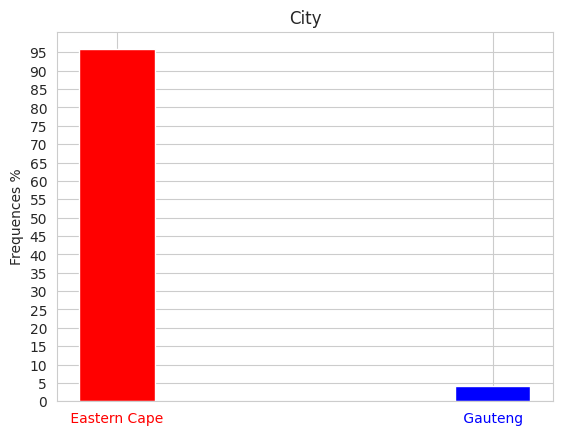

 Eastern Cape     95.833333
 Gauteng           4.166667
Name: City, dtype: float64


In [31]:
frequences = stat_nonnum_feature (df['City'])
colors = ['red','blue']
plt.bar (frequences.index, frequences.values, edgecolor='white', color=colors, width=0.2)
plt.ylabel('Frequences %')
plt.title('City')
plt.yticks(range(0,100,5))
for i, color in zip(plt.gca().get_xticklabels(), colors):
    i.set_color(color)
plt.show()
print (frequences)

**Comments**<br>
The most  of properties are loacte at Eastern Cape: 95.833333 % (red)<br>
We observe that the distribution of data according to the 'city' variable is imbalanced. One could then hypothesize that the location of properties does not influence their prices.

### **2.2.3) Bathrooms**

The standard deviation: 1.2355880310238267
Range: 5.0


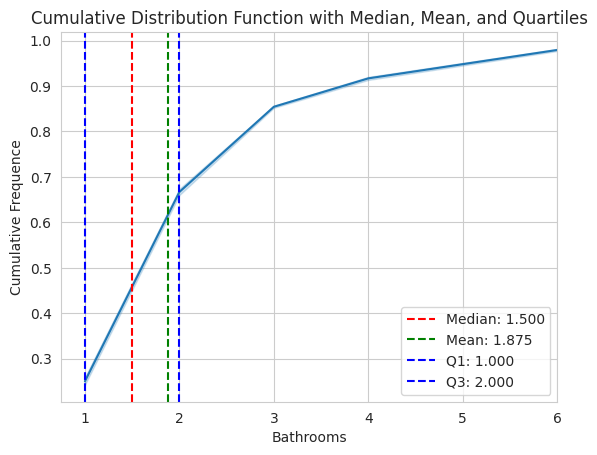

In [32]:
stat = stat_numerical_feature(df['Bathrooms'])
std = stat['std']
print (f"The standard deviation: {std}")
print (f"Range: {stat['max'] - stat['min']}")
mean = stat['mean']
median = stat['median']
Q1 = stat['Q1']
Q3 = stat['Q3']
data_sorted = np.sort(df['Bathrooms'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

sns.lineplot(x=data_sorted, y=cdf)
plt.axvline(median, color='r', linestyle='--', label=f'Median: {median:.3f}')
plt.axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axvline(Q1, color='b', linestyle='--', label=f'Q1: {Q1:.3f}')
plt.axvline(Q3, color='b', linestyle='--', label=f'Q3: {Q3:.3f}')
plt.xlim(right=max(df['Bathrooms'].unique()))
plt.legend()
plt.title('Cumulative Distribution Function with Median, Mean, and Quartiles')
plt.xlabel('Bathrooms')
plt.ylabel('Cumulative Frequence')
plt.show()

**Comments**<br>
According to the graph, the distribution of the number of bathrooms is concentrated in the range of 1 to 2; indeed, 75% of the properties have a number of bathrooms between 1 and 2. On the other hand, there is a significant variance in the number of bathrooms (from 2 to 6) for the remaining 25%. It might be worth trying to detect outliers.

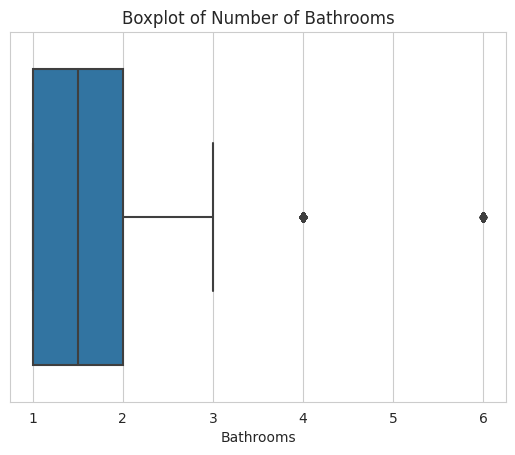

Upepr limit: 3.5

Outliers percentage: 12.5%

Potential outliers:
       Price(ZAR) House Type            City  Bedrooms  Bathrooms  Size(m2)
4      4500000.0      House   Eastern Cape        8.0        6.0     387.5
11     5950000.0      House   Eastern Cape        5.0        4.0     450.0
17     6700000.0      House   Eastern Cape        5.0        4.0     325.0
29     4500000.0      House   Eastern Cape        8.0        6.0     387.5
36     5950000.0      House   Eastern Cape        5.0        4.0     450.0
...          ...        ...             ...       ...        ...       ...
2461   5950000.0      House   Eastern Cape        5.0        4.0     450.0
2467   6700000.0      House   Eastern Cape        5.0        4.0     325.0
2479   4500000.0      House   Eastern Cape        8.0        6.0     387.5
2486   5950000.0      House   Eastern Cape        5.0        4.0     450.0
2492   6700000.0      House   Eastern Cape        5.0        4.0     325.0

[300 rows x 6 columns]


In [33]:
sns.boxplot(x=df['Bathrooms'])
plt.title('Boxplot of Number of Bathrooms')
plt.show()

IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

print (f"Upepr limit: {upper_limit}\n")
outliers = df[(df['Bathrooms'] > upper_limit)]
outliers_percentage = (outliers.shape[0]/df.shape[0])*100
print (f"Outliers percentage: {outliers_percentage}%\n")
print (f"Potential outliers:\n {outliers}")

bathrooms_outliers = set (outliers.index)

**Comments**<br>
We observe that data with a number of bathrooms greater than 3.5 are potentially outliers, and they account for 12.5% of the data.

### **2.2.4) Bedrooms**

The standard deviation: 1.5940480861936628
Range: 6.0
Skewness: 1.53302744183371


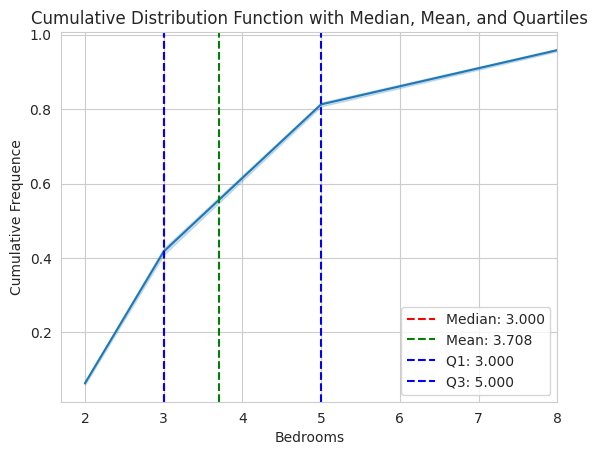

In [34]:
from scipy.stats import skew

stat = stat_numerical_feature(df['Bedrooms'])
std = stat['std']
print (f"The standard deviation: {std}")
print (f"Range: {stat['max'] - stat['min']}")
mean = stat['mean']
median = stat['median']
Q1 = stat['Q1']
Q3 = stat['Q3']
data_sorted = np.sort(df['Bedrooms'])
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

print (f"Skewness: {skew(df['Bedrooms'])}")

sns.lineplot(x=data_sorted, y=cdf)
plt.axvline(median, color='r', linestyle='--', label=f'Median: {median:.3f}')
plt.axvline(mean, color='g', linestyle='--', label=f'Mean: {mean:.3f}')
plt.axvline(Q1, color='b', linestyle='--', label=f'Q1: {Q1:.3f}')
plt.axvline(Q3, color='b', linestyle='--', label=f'Q3: {Q3:.3f}')
plt.xlim(right=max(df['Bedrooms'].unique()))
plt.legend()
plt.title('Cumulative Distribution Function with Median, Mean, and Quartiles')
plt.xlabel('Bedrooms')
plt.ylabel('Cumulative Frequence')
plt.show()

**Comments**<br>
According to the graph, the variance of the data appears to be concentrated within the 75% of the data below the third quartile, with a variance of 2 bedrooms to 5 bedrooms. However, it is observed that the data is highly skewed; indeed, the skewness is: 1.53302744183371 > 0, that means the data is skewed to the right of the mean.

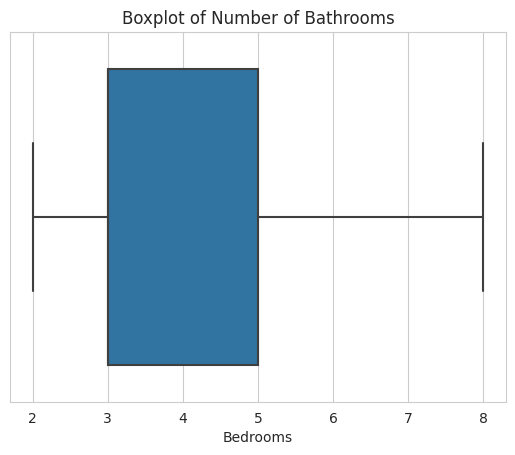

Upper_limit: 8.0


In [35]:
sns.boxplot(x=df['Bedrooms'])
plt.title('Boxplot of Number of Bathrooms')
plt.show()

IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

print (f"Upper_limit: {upper_limit}")

**Comments**<br>
According to the above boxplot, it seems that there are no outliers. This reflects the fact that the data is more or less standard.

### **2.2.3) Price**

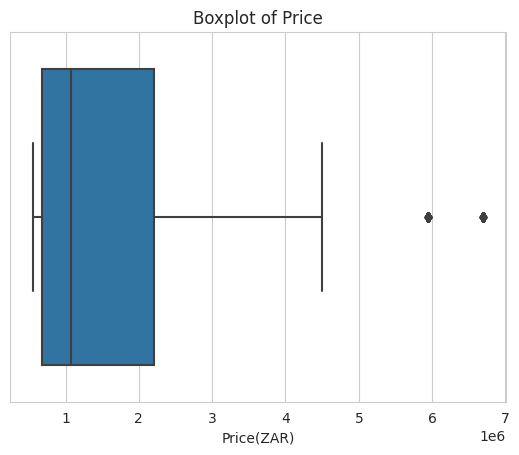

Upper_limit: 4505625.0
Outliers percentage: 12.5%


In [36]:
sns.boxplot(x=df['Price(ZAR)'])
plt.title('Boxplot of Price')
plt.show()

Q1 = stat_numerical_feature(df['Price(ZAR)'])['Q1']
Q3 = stat_numerical_feature(df['Price(ZAR)'])['Q3']
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
outliers = df[df['Price(ZAR)']>upper_limit]
price_outliers = set(outliers.index)

print (f"Upper_limit: {upper_limit}")
outlier_percentage = (outliers.shape[0]/df.shape[0])*100
print (f"Outliers percentage: {outliers_percentage}%")

**Comments**<br>
The distribution of prices exhibits the same characteristic as the distribution of the number of bathrooms, and they share the same rate of outliers.

### **2.2.4) Removing the common outliers.**

In [37]:
outliers = bathrooms_outliers & price_outliers
outliers_percentage = (len(outliers)/df.shape[0])*100

print (f"Outliers prrcentage: {outliers_percentage: .3f}%")

outliers = list(outliers)
df = df.drop (outliers)
print ("Clean data:\n")
df

Outliers prrcentage:  8.333%
Clean data:



,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
0,650000.0,Homes,Eastern Cape,3.0,1.0,139.4
1,2200000.0,Homes,Eastern Cape,3.0,3.0,139.4
2,780000.0,Homes,Eastern Cape,2.0,1.0,139.4
3,2200000.0,Homes,Eastern Cape,2.0,2.0,139.4
4,4500000.0,House,Eastern Cape,8.0,6.0,387.5
...,...,...,...,...,...,...
2494,580000.0,Homes,Eastern Cape,3.0,1.0,139.4
2495,695000.0,Homes,Eastern Cape,3.0,1.0,139.4
2496,590000.0,Homes,Gauteng,3.0,1.0,139.4
2497,968000.0,Flat,Eastern Cape,3.0,1.0,69.0


## **2.3) Multivariate Analysis**

### **Correlation between variables**

First, we will turn categorical features into numerical features. This prcocess is called features encoding

In [38]:
data = df.values
categ_house = df['House Type'].unique()
categ_city = df['City'].unique()
code_house = list(range(len(categ_house)))
code_city = list(range(len(categ_city)))
for i in range(df.shape[0]) :
  if data[i][1] == categ_house[0]:
    data[i][1] = code_house[0]
  if data[i][1] == categ_house[1]:
    data[i][1] = code_house[1]
  if data[i][1] == categ_house[2]:
    data[i][1] = code_house[2]
  data[i][1] = float(data[i][1])

for i in range(df.shape[0]) :
  if data[i][2] == categ_city[0]:
    data[i][2] = code_city[0]
  if data[i][2] == categ_city[1]:
    data[i][2] = code_city[1]
  data[i][2] = float(data[i][2])

col = df.columns.tolist()
encoded_df = pd.DataFrame(data, columns=col)
del col
encoded_df

,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
0,650000.0,0.0,0.0,3.0,1.0,139.4
1,2200000.0,0.0,0.0,3.0,3.0,139.4
2,780000.0,0.0,0.0,2.0,1.0,139.4
3,2200000.0,0.0,0.0,2.0,2.0,139.4
4,4500000.0,1.0,0.0,8.0,6.0,387.5
...,...,...,...,...,...,...
2195,580000.0,0.0,0.0,3.0,1.0,139.4
2196,695000.0,0.0,0.0,3.0,1.0,139.4
2197,590000.0,0.0,1.0,3.0,1.0,139.4
2198,968000.0,2.0,0.0,3.0,1.0,69.0


**Standardization of variables**

In [39]:
col = list(encoded_df.columns)
Price = encoded_df['Price(ZAR)']
encoded_df[col] = (encoded_df[col] - encoded_df[col].mean()) / encoded_df[col].std()
encoded_df['Price(ZAR)'] = Price
del Price
encoded_df

,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
0,650000.0,-0.573332,-0.218168,-0.366005,-0.617924,-0.460516
1,2200000.0,-0.573332,-0.218168,-0.366005,1.194653,-0.460516
2,780000.0,-0.573332,-0.218168,-0.985398,-0.617924,-0.460516
3,2200000.0,-0.573332,-0.218168,-0.985398,0.288364,-0.460516
4,4500000.0,1.228569,-0.218168,2.730961,3.913517,2.07232
...,...,...,...,...,...,...
2195,580000.0,-0.573332,-0.218168,-0.366005,-0.617924,-0.460516
2196,695000.0,-0.573332,-0.218168,-0.366005,-0.617924,-0.460516
2197,590000.0,-0.573332,4.581534,-0.366005,-0.617924,-0.460516
2198,968000.0,3.030469,-0.218168,-0.366005,-0.617924,-1.179224


Function which return mutual information of the label (Price column) and a descriptor

In [40]:
from sklearn.metrics import mutual_info_score as mutual
from math import sqrt

def mutual_info (col1, col2) :
  entropy_col1 = mutual (col1,col1)
  entropy_col2 = mutual (col2,col2)
  mutual_entropy = mutual (col1,col2)
  return (mutual_entropy/sqrt(entropy_col1*entropy_col2))*100

**Mutual information matrix**

In [41]:
all_columns = df.columns
dim = len (all_columns)
matrix = np.eye (dim)
i = 0
for u in all_columns:
  j = 0
  for v in all_columns :
    matrix[i, j] = abs(mutual_info (encoded_df[u], encoded_df[v]))
    j = j+1
  i = i+1

matrix_df = pd.DataFrame (matrix, columns=all_columns, index=all_columns)
del matrix
print ("This is the mutual information matrix of the dataset in percentage(% format):\n")
matrix_df

This is the mutual information matrix of the dataset in percentage(% format):



,Price(ZAR),House Type,City,Bedrooms,Bathrooms,Size(m2)
Price(ZAR),100.000000,50.178415,25.628438,57.375965,55.190385,68.561487
House Type,50.178415,100.000000,4.109313,8.820819,19.141032,62.630835
City,25.628438,4.109313,100.000000,4.804324,6.685428,4.985003
Bedrooms,57.375965,8.820819,4.804324,100.000000,21.150178,21.242875
Bathrooms,55.190385,19.141032,6.685428,21.150178,100.000000,28.411234
Size(m2),68.561487,62.630835,4.985003,21.242875,28.411234,100.000000


****

**Comments**<br>
- We first deduce from this mutual information matrix that our hypothesis stated earlier regarding the fact that the 'City' variable does not influence the property prices is not well supported. Indeed, the correlation between the price and the location (City) is only 26%, which is not very significant.<br>
- We observe that the other descriptive variables are significantly (over 50%) correlated with the target variable, price. This suggests that dimensionality reduction should be applied to the data to untangle the correlations between the descriptor variables.<br>
- Also, it is observed that Size and House Type are correlated at 69%, indicating that Size and House Type are significantly dependent.

**Plots of relationship between descriptors**

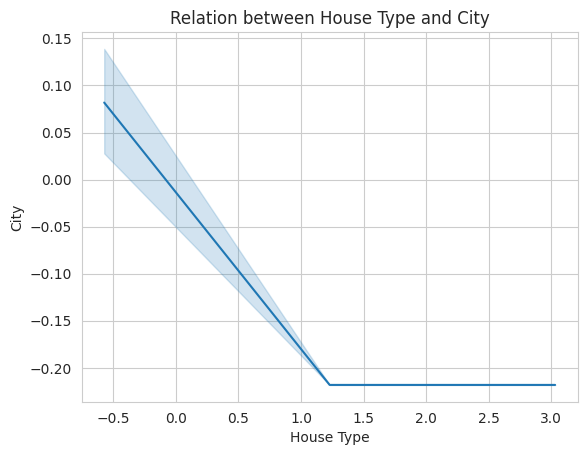

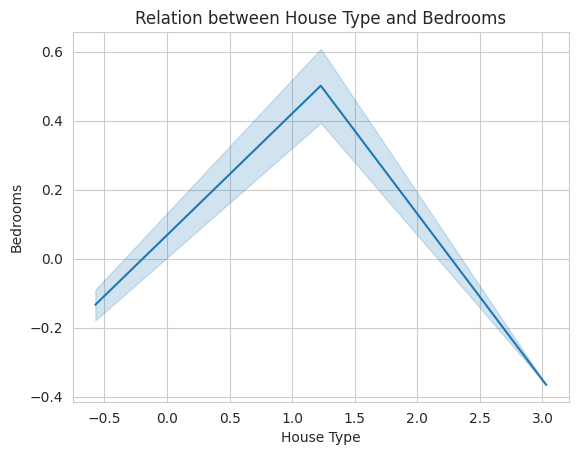

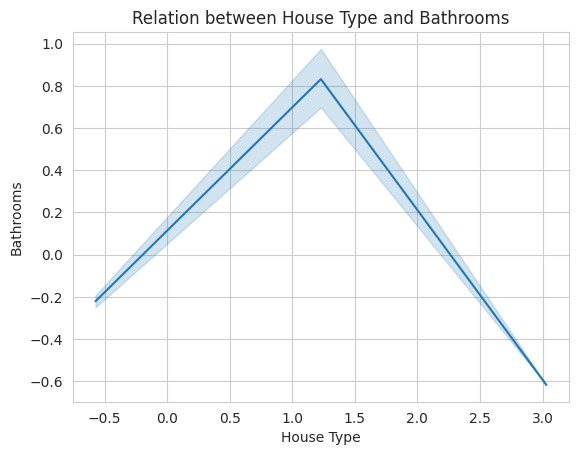

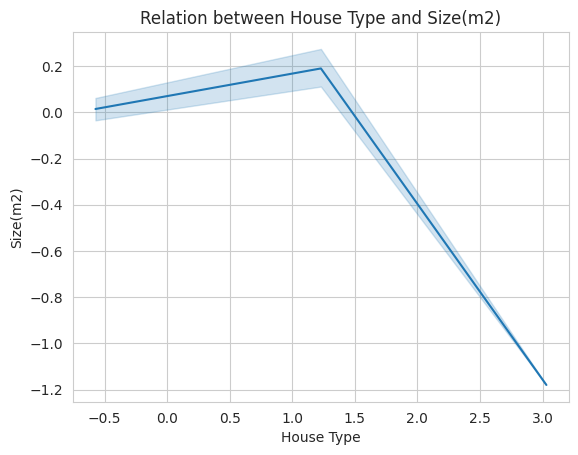

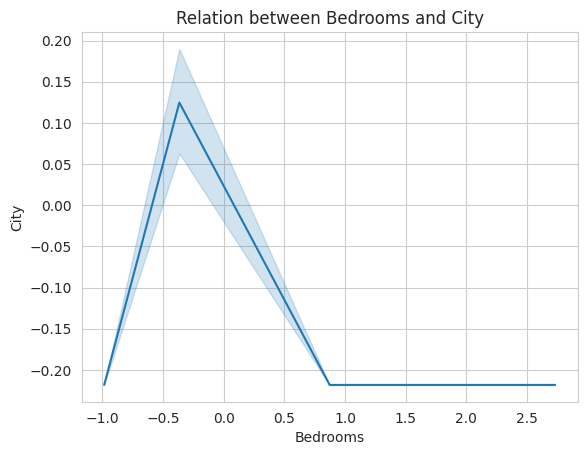

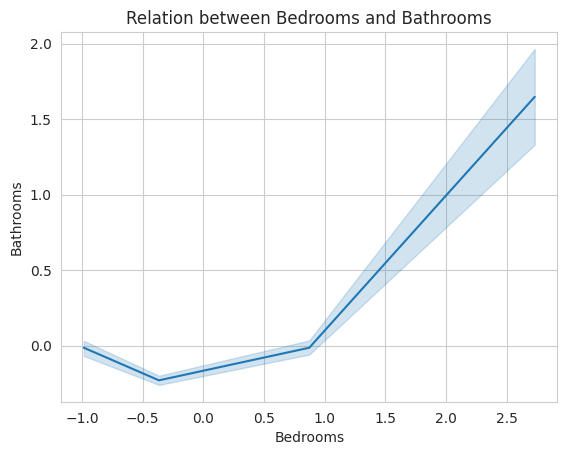

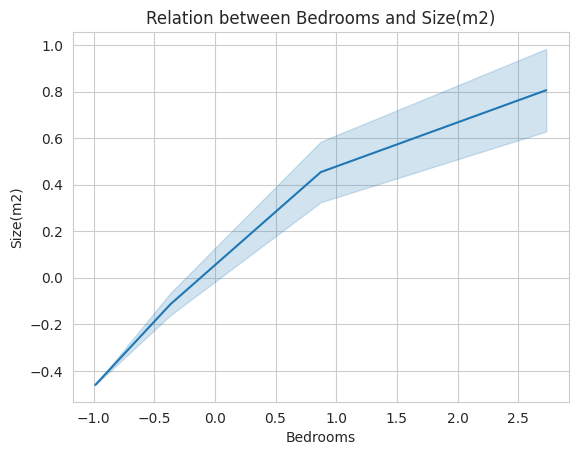

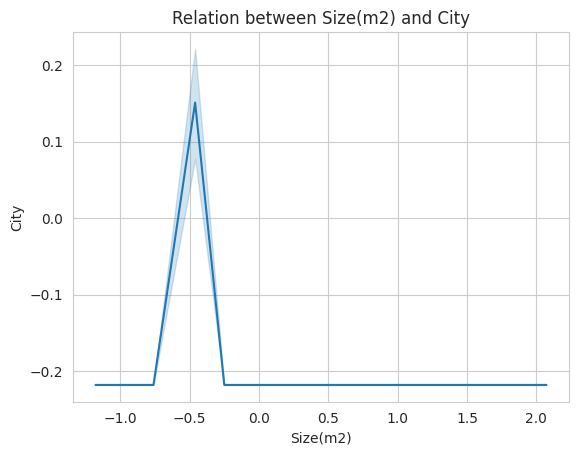

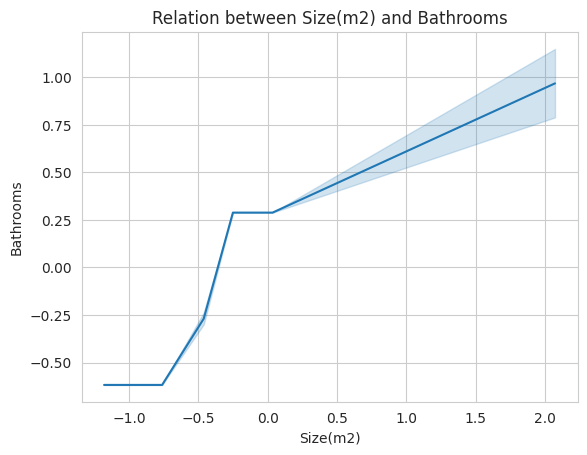

In [42]:
col = list(encoded_df.columns)
del col[0]
var = col
for u in col:
  var.remove(u)
  for v in var:
    if u == v:
      pass
    else:
      sns.lineplot(x=u, y=v, data=encoded_df)
      plt.xlabel(u)
      plt.ylabel(v)
      plt.title(f"Relation between {u} and {v}")
      plt.show()
      print("\n")

del var

**Relationship between target and descriptor**

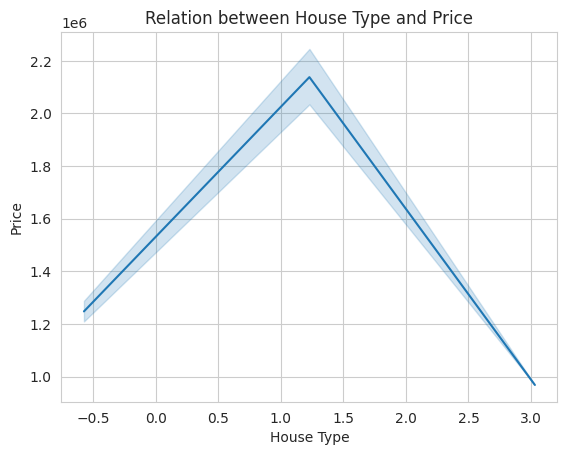

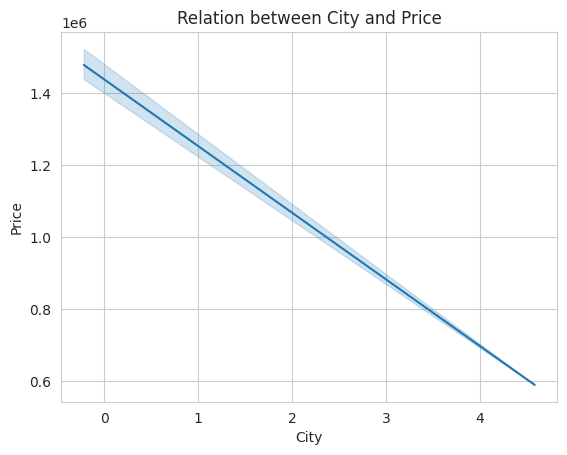

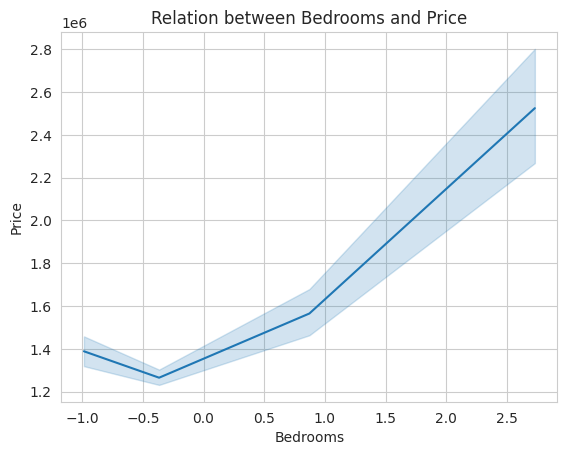

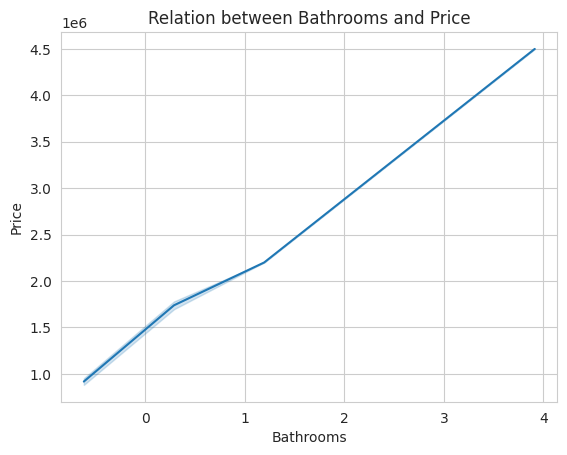

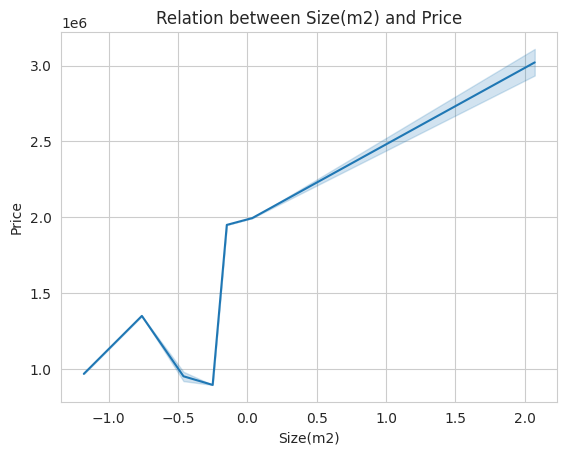

In [43]:
col = list(encoded_df.columns)
del col[0]
for u in col:
  sns.lineplot(x=u, y='Price(ZAR)', data=encoded_df)
  plt.xlabel(u)
  plt.ylabel('Price')
  plt.title(f"Relation between {u} and Price")
  plt.show()
  print("\n")

## **2.4) Features Engineering**

According to the mutual information of Price and City, we can drop the City column for more consistency.

In [ ]:
encoded_df.drop('City', axis=1, inplace=True)
encoded_df

,Price(ZAR),House Type,Bedrooms,Bathrooms,Size(m2)
0,650000.0,-0.573332,-0.366005,-0.617924,-0.460516
1,2200000.0,-0.573332,-0.366005,1.194653,-0.460516
2,780000.0,-0.573332,-0.985398,-0.617924,-0.460516
3,2200000.0,-0.573332,-0.985398,0.288364,-0.460516
4,4500000.0,1.228569,2.730961,3.913517,2.07232
...,...,...,...,...,...
2195,580000.0,-0.573332,-0.366005,-0.617924,-0.460516
2196,695000.0,-0.573332,-0.366005,-0.617924,-0.460516
2197,590000.0,-0.573332,-0.366005,-0.617924,-0.460516
2198,968000.0,3.030469,-0.366005,-0.617924,-1.179224


We observed that the correlation between Price and House Type was 50%. Therefore, we are in a case of uncertainty about the significance of this index. To dispel the doubt, we will perform a Chi-squared independence test.

In [ ]:
from scipy.stats import chi2_contingency

observed_data = pd.crosstab(encoded_df['House Type'], encoded_df['Price(ZAR)'])
chi2, p, _, _ = chi2_contingency(observed_data)

print(f"p-value : {p}\n")
alpha = [0.05, 0.1]
for i in alpha:
  print (f"\tTest with alpha={i}:")
  if p < i:
    print ("Price and House Type are not independent.\n")
  else:
    print ("Price and House Type are independent.\n")


p-value : 0.0

	Test with alpha=0.05:
Price and House Type are not independent.

	Test with alpha=0.1:
Price and House Type are not independent.



**Comments**<br>
We conclude that the correlation value is significant, and therefore, we retain the descriptor 'House Type

**Dimension Reduction**<br>
According to the mutual information matrix, Size and House Type are significantly (60%) correlated then we should perform a dimension reduction.<br>
Here, we will perfom an ACP

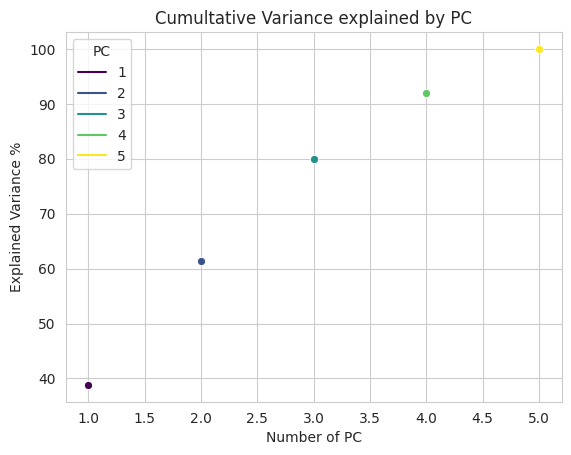

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
col = list (encoded_df)
del col[0]
pc = pca.fit_transform(encoded_df[col])
explained_variance = pca.explained_variance_ratio_
cumultative_variance = np.cumsum(explained_variance)
cumvar_df = pd.DataFrame({'Number of PC': range(1, len(cumultative_variance) + 1),
                                       'Explained Variance': cumultative_variance*100})
sns.lineplot(x='Number of PC', y='Explained Variance', hue='Number of PC', data=cumvar_df, marker='o', palette='viridis')
plt.xlabel('Number of PC')
plt.ylabel('Explained Variance %')
plt.title('Cumultative Variance explained by PC')
plt.legend(title='PC')
plt.show()

**Comments**<br>
We observe that 4 principal components are sufficient to explain more than 90% of the variance in the data. This reinforces the existence of a correlation between the two descriptor variables, Size and House Type.

In [ ]:
var = ['pc1', 'pc2', 'pc3', 'pc4']
pca = PCA(4)
pc = pca.fit_transform(encoded_df[col])
pc_df = pd.DataFrame(pc, columns=var)
pc_df['Price'] = encoded_df['Price(ZAR)']
pc_df

,pc1,pc2,pc3,pc4,Price
0,-0.875165,-0.146840,-0.482882,0.273409,650000.0
1,0.227616,-0.125597,-0.248212,-0.310317,2200000.0
2,-1.205785,-0.122726,-0.625441,-0.223076,780000.0
3,-0.654394,-0.112104,-0.508106,-0.514938,2200000.0
4,5.187591,0.046383,1.030239,-0.210434,4500000.0
...,...,...,...,...,...
2195,-0.875165,-0.146840,-0.482882,0.273409,580000.0
2196,-0.875165,-0.146840,-0.482882,0.273409,695000.0
2197,-1.901411,-2.078921,3.737174,-0.374131,590000.0
2198,-0.506639,3.032767,0.929857,-0.376922,968000.0
